In [619]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [620]:
def perspectiveTransform(img):
    (h, w) = (img.shape[0], img.shape[1])
    og = np.float32([[w // 2, h], [w // 2, h], [0, h], [w, h]])
    ne = np.float32([[100, 0], [w, 0], [100, h], [100, h]])
    return cv2.warpPerspective(img, cv2.getPerspectiveTransform(og, ne), (w, h))

In [621]:
def gray(img):
    img = np.asarray(img)
    return img #cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [622]:
def gaussianBlur(img):
    return cv2.GaussianBlur(img, (5,5), 0)

In [623]:
def canny(img):
    return cv2.Canny(img, 100, 200)

In [624]:
def maskTop(img):
    height, width = img.shape
    # mask all data but a particular window
    return cv2.bitwise_and(img,
                           cv2.fillPoly(np.zeros_like(img),
                                        np.array([
                                           [(int(width*0.2), height-100), (width//2, 430), (int(width*0.9), height-100)]
                                        ]), 255))

In [625]:
def clampX(n):
    return max(0, min(n, 1280))
def clampY(n):
    return max(0, min(n, 720))

In [626]:
def make_points(image, average):
    slope, y_int = average
    y1 = image.shape[0]
    y2 = int(y1 * 0.66) # scale the line
    x1 = int((y1 - y_int) // slope)
    x2 = int((y2 - y_int) // slope)
    return np.array([x1, y1, x2, y2])

In [627]:
def average(image, lines):
    left = []
    right = []

    if lines is not None:
      for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        #fit line to points, return slope and y-int
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        y_int = parameters[1]
        #lines on the right have positive slope, and lines on the left have neg slope
        if slope < 0:
            left.append((slope, y_int))
        else:
            right.append((slope, y_int))
            
    #takes average among all the columns (column0: slope, column1: y_int)
    right_avg = np.average(right, axis=0)
    left_avg = np.average(left, axis=0)
    if ((type(right_avg) != np.ndarray) or
        (type(left_avg) != np.ndarray)):
        return np.nan
    left_line = make_points(image, left_avg)
    right_line = make_points(image, right_avg)
    return np.array([left_line, right_line])

In [628]:
prev_lines = None

In [629]:
def full_workflow(img, first=False):
    global prev_lines
    if first:
        prev_lines = None
    img = gaussianBlur(gray((img)))
    cannied = canny(img)
    maskedCanny = maskTop(cannied)
    lines = cv2.HoughLinesP(maskedCanny, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    averaged_lines = average(img, lines)
    # store previous averaged lines
    # if slope.diff(o.slope) > 0.6 ? use old slope : use new slope
    if (type(averaged_lines) != np.ndarray):
        if prev_lines is not None:
            to_send = cv2.addWeighted(img, 0.8, prev_lines, 1, 1)
            return (cannied,maskedCanny,to_send)
        else:
            return (cannied,maskedCanny,img)
    black_lines = np.zeros_like(img)
    x1, y1, x2, y2 = averaged_lines[0]
    cv2.line(black_lines, (clampX(x1), clampY(y1)), (clampX(x2), clampY(y2)), (255, 0, 0), 10)
    x1, y1, x2, y2 = averaged_lines[1]
    cv2.line(black_lines, (clampX(x1), clampY(y1)), (clampX(x2), clampY(y2)), (255, 0, 0), 10)
    prev_lines = black_lines
    lanes = cv2.addWeighted(img, 0.8, black_lines, 1, 1)
    return (cannied,maskedCanny,lanes)

In [630]:
temp1 = cv2.imread("temp3 2.jpg")

In [631]:
temp1 = cv2.resize(temp1,(1280,720))

In [632]:
temp2 = cv2.imread("22.png")

In [633]:
res1 = full_workflow(temp1, True)

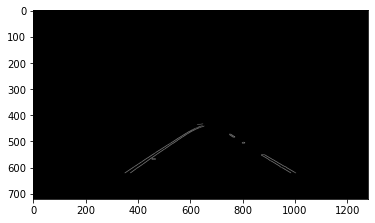

In [634]:
plt.imshow(cv2.cvtColor(res1[1], cv2.COLOR_BGR2RGB))

In [635]:
cv2.imwrite("res4.png", res1[2])

True

In [636]:
plt.show()

In [637]:
plt.draw()

<Figure size 432x288 with 0 Axes>

In [638]:
plt.savefig("res1.png")

<Figure size 432x288 with 0 Axes>

In [639]:
vid = cv2.VideoCapture("video.mp4")

In [640]:
ret, frame = vid.read()

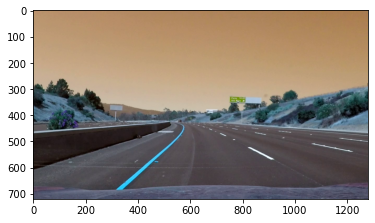

In [641]:
plt.imshow(frame)

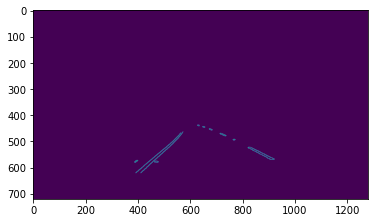

In [642]:
t = full_workflow(frame)
plt.imshow(t[1])

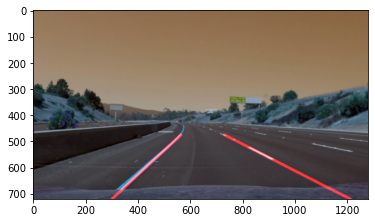

In [643]:
plt.imshow(t[2])

In [644]:
len(t[1][0])

1280

In [645]:
final = cv2.VideoWriter('final.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 20, (720,1280))

In [646]:
import time

In [647]:
while True:
    ret, frame = vid.read()
    t = full_workflow(frame)
    cv2.imshow("Video", t[2])
    cv2.imshow("Video2", t[1])
    cv2.imshow("Video3", t[0])
    cv2.imshow("Video1", frame)
    final.write(t[1])
    if cv2.waitKey(30) & 0xff == ord('q'):
            break
vid.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
final.release()

In [ ]:
plt.imshow(frame)

In [ ]:
t2 = ho(frame)

In [ ]:
vid.release()

In [ ]:
cv2.destroyAllWindows()